In [2]:
#@sushil
#@HaLab
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

import lumicks.pylake as lk
%matplotlib widget
%matplotlib inline

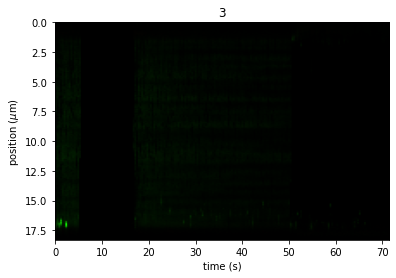

In [3]:
directory_h= r"F:\Sushil\112022" #directory
d_current = r"/"
directory_save = directory_h + d_current
filename = glob.glob(directory_save+'*Kymograph 3.h5') #just need to give the kymo number , 1 ,2 or 3....
#if you have scan, chnage Kymograph to Scan xx.h5, i.e you cna change only number and that will load next file.
file = lk.File(filename[0])
name, kymo = file.kymos.popitem()
kymo.plot_rgb(aspect="auto",vmin=1,vmax=20)
plt.show()
# plt.savefig(b+'plot.png')


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

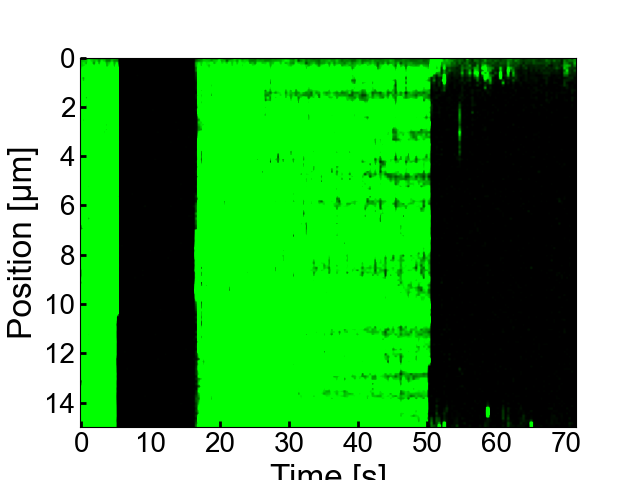

In [4]:
%matplotlib widget
plt.figure(dpi=100)#this is for the figure resolution
data=kymo["0s":"80s"].crop_by_distance(1,16)#first part is time second is distance
data.plot_green(aspect='auto',vmin=1,vmax=60)#change green ,red or rgb for the figure
#vmin will take care of background and vmax will take care of intnsity, chnage it as you deem suitale
plt.title("")#give your  title as you want
plt.xlabel('Time [s]',fontsize=24,fontname="Arial")
plt.ylabel('Position [\u03bcm]',fontsize=24,fontname="Arial")
plt.tick_params(axis="x", direction="in", length=4, width=2)
plt.tick_params(axis="y", direction="in", length=4, width=2)
plt.xticks(fontsize=20, fontname="Arial")
plt.yticks(fontsize=20,fontname="Arial")


In [96]:
green=data.green_photon_count.data
red=data.red_photon_count.data
time=data.blue_photon_count.seconds
#plt.plot(time,green)
#plt.hist(green)

Your Binned Time is:0.015 ms


Text(0, 0.5, 'Position [μm]')

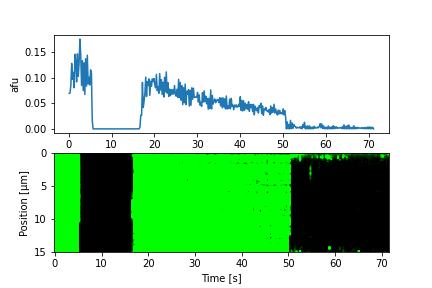

In [125]:
%matplotlib widget
import pandas as pd
ts=time

bn = 15000    
#our C-trap auisition is in nanosecondsi.e each data point is 1 ns ,to caculate the timescale of 
#binned use the function below
def timescale(x):
    time_miliseconds=x/1e6
    return time_miliseconds
#print(timescale(bn))   
print('Your Binned Time is:{} ms'.format(timescale(bn)))

bnd = []
for i in range(0,len(ts)-bn,bn):
    gb=sum(green[i:i+bn])
    rb=sum(red[i:i+bn])
    bnd.append([np.mean(ts[i:i+bn]),gb,rb])

df = pd.DataFrame(bnd,columns=['time','green','red'])
from sklearn import preprocessing
a=np.array((df.iloc[:,1]))
normalized_arr = preprocessing.normalize([a.flatten()],axis=1)
#print(normalized_arr)


fig,ax = plt.subplots(2,1)
ax[0].plot(df.iloc[:,0], normalized_arr.flatten())
data.plot_green(aspect='auto',vmin=1,vmax=40)
#ax[0].set_title('Bin ='+str(bn))
ax[0].set_ylabel('afu')
plt.title("")#give your  title as you want
plt.xlabel('Time [s]')
plt.ylabel('Position [\u03bcm]')




(371,)

Text(0, 0.5, 'photon count')

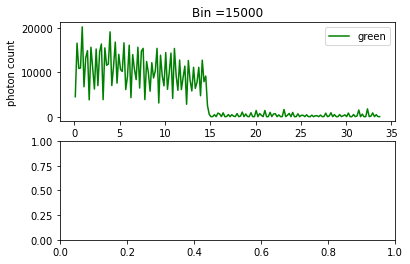

In [13]:
fig,ax = plt.subplots(2,1)
df.plot.line(ax=ax[0],x='time',y=['green'],color={"green": "green"})
ax[0].set_title('Bin ='+str(bn))
ax[0].set_ylabel('photon count')


In [31]:
green=data.green_image
times=data.timestamps
#kymo.plot_blue(data)
#help(kymo.timestamps)
#plt.plot((times-times[0])/1e9,green)
time=(times-times[0])/1e9
print(len(time))
print(len(green))
#plt.plot(time,green)
#plt.plot(time, green)

170
170


Kymo(pixels=170)

Text(0, 0.5, 'Summed signal')

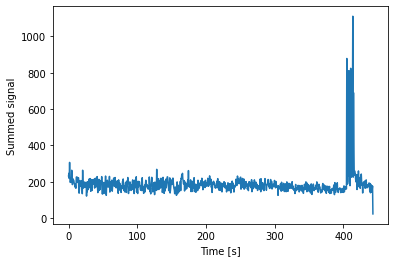

In [25]:
traces = lk.track_greedy(data, 'red', line_width=3, pixel_threshold=3, window=6)
plt.figure()
longest_trace_idx = np.argmax([len(trace) for trace in traces])
longest_trace = traces[longest_trace_idx]
plt.plot(longest_trace.seconds, longest_trace.sample_from_image(num_pixels=5))
plt.xlabel('Time [s]')
plt.ylabel('Summed signal')